In [173]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import numpy as np

#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.<br />
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.<br />
Создайте датафреймы X и y из этих данных.<br />
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.<br />
Масштабируйте данные с помощью StandardScaler.<br />
Постройте модель TSNE на тренировочный данных с параметрами:<br />
n_components=2, learning_rate=250, random_state=42.<br />
Постройте диаграмму рассеяния на этих данных.

In [174]:
from sklearn.datasets import load_boston
boston = load_boston()

In [175]:
trgt = boston.target

In [176]:
fn = boston.feature_names

In [177]:
fn

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [178]:
X = pd.DataFrame(boston.data, columns=fn)

In [179]:
y = pd.DataFrame(trgt, columns=['price'])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
lr = LinearRegression()

In [184]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
y_pred = lr.predict(X_test)

y_pred.shape

(102, 1)

In [186]:
lr.coef_

array([[-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,
         2.78443820e+00, -1.72026334e+01,  4.43883520e+00,
        -6.29636221e-03, -1.44786537e+00,  2.62429736e-01,
        -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]])

In [187]:
plt.rcParams['figure.figsize'] = 6, 4

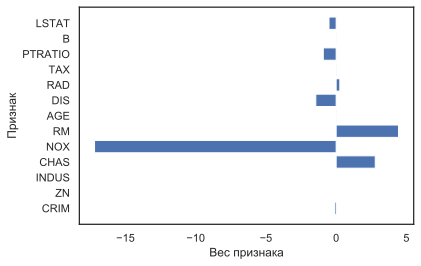

In [188]:
plt.barh(fn, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [189]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [190]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=fn)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=fn)

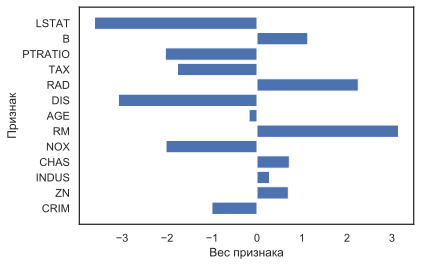

In [191]:
lr.fit(X_train_scaled, y_train)

plt.barh(fn, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [192]:
from sklearn.manifold import TSNE

In [193]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
tsne_results = tsne.fit_transform(X_train)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1.98799467086792 seconds


In [194]:
import seaborn as sns
sns.set(style="white")

In [195]:
# N = tsne_results.shape
N = 10000

In [201]:
df_s = pd.DataFrame(X_train)
df_s.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [203]:
tsne_results[:,0].shape

(404,)

In [204]:
df_s['tsne-2d-one'] = tsne_results[:,0]
df_s['tsne-2d-two'] = tsne_results[:,1]

In [205]:
# Example
# sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
#             sizes=(40, 400), alpha=.5, palette="muted",
#             height=6, data=mpg)

In [209]:
df_s.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,tsne-2d-one,tsne-2d-two
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,-26.225309,-16.375685
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.026859,9.140368
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,9.824575,4.759353
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,-31.103294,-4.273397
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,20.520693,10.289940


Постройте диаграмму рассеяния на этих данных.|

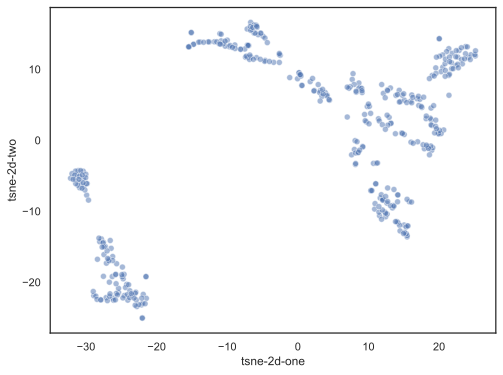

In [215]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
#     hue="",
    palette=sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True),
    data=df_s,
    legend="full",
    alpha=0.5
)
plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.<br />
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.<br />
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.<br />
Вычислите средние значения price и CRIM в разных кластерах.